In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Notes for the code:
- need to restrict flows to $\mathbf{R}_{++}$

## Incidence Matrix Initiation

**Enumeration of Lakes for the Incidence Matrix:**
- Lake Superior: 1
- Lake Michigan/Huron : 2
- Lake St. Clair: 3
- Lake Erie: 4
- Lake Ontario: 5
- Sink (including all bodies of water after the St. Lawrence River): 6


**Enumeration of Edges for the Incidence Matrix:**
- St. Mary's River: (1, 2)
- St. Clair River: (2, 3)
- Detroit River: (3, 4)
- Niagra River: (4, 5)
- St. Lawrence River: (5, 6)

We take the following DAG $G = (N, E)$, where $V = \left\{ 1, 2, 3, 4, 5, 6 \right\}$ and $E = \left\{ (1, 2), (2, 3), (3, 4), (4, 5), (5, 6) \right\}$, where $(i, j) \in E$ is an ordered pair representing an edge from node $i$ to node $j$.

In [34]:
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]
N = 6
L = 5

# Create an empty matrix to populate
A = np.zeros((N, L))

In [35]:
# Populate the matrix
edge_counter = 0
for edge in edges:
    i = edge[0] - 1
    j = edge[1] - 1
    A[i, edge_counter] = -1
    A[j, edge_counter] = 1
    edge_counter += 1

In [36]:
# Incidence Matrix
A

array([[-1.,  0.,  0.,  0.,  0.],
       [ 1., -1.,  0.,  0.,  0.],
       [ 0.,  1., -1.,  0.,  0.],
       [ 0.,  0.,  1., -1.,  0.],
       [ 0.,  0.,  0.,  1., -1.],
       [ 0.,  0.,  0.,  0.,  1.]])

Now we need to evaluate the following

$ y_{t+1} = Ax_t + s_t $

where $x_t \in \mathbf{R}^{5}$ is the total flow for the month and $s_t \in \mathbf{R}^{6}, s_6 = 0$ are the net flows for that month. 

In [5]:
# Flow between Superior and Heron
A[0, 0] = A[0,0] * (1 / (82.103 * 1e9 ))
A[1, 0] = A[1,0] * (1 / (117.63 * 1e9 ))

# Flow between Heron and Clair
A[1, 1] = A[1,1] * (1 / (117.63 * 1e9 ))
A[2, 1] = A[2,1] * (1 / (1.11 * 1e9 ))

# Flow between Clair and Erie
A[2, 2] = A[2,2] * (1 / (1.11 * 1e9 ))
A[3, 2] = A[3, 2] * (1 / (25.74 * 1e9))

# Flow between Erie and Ontario
A[3, 3] = A[3, 3] * (1 / (25.74 * 1e9))
A[4, 3] = A[4, 3] * (1 / (18.96 * 1e9))

# Flow out of Ontario and into Sink
A[4, 4] = A[4, 4] * (1 / (18.96 * 1e9))
# A[5, 4] = A[5, 4]

In [6]:
flow_data = np.load('../Data/flow-vectors.npy')

exogenous_data = np.load('../Data/exogenous_2012_forward.npy')

depth_data = np.load('../Data/depth_vectors.npy')

In [7]:
depth_data[:, 1]

array([175.92, 175.87, 175.9 , 175.92, 176.  , 176.1 , 176.13, 176.13,
       176.09, 175.98, 175.89, 175.81, 175.77, 175.78, 175.78, 175.85,
       175.95, 176.06, 176.05, 176.03, 176.01, 176.03, 176.05, 176.05,
       175.99, 175.95, 175.99, 176.06, 176.19, 176.29, 176.33, 176.32,
       176.24, 176.14, 176.01, 175.91, 175.82, 175.75, 175.73, 175.82,
       175.92, 176.  , 176.04, 176.02, 175.94, 175.87, 175.89, 175.9 ,
       175.87, 175.84, 175.9 , 175.98, 176.12, 176.31, 176.37, 176.33,
       176.28, 176.15, 176.1 , 176.08, 176.08, 176.1 , 176.1 , 176.14,
       176.19, 176.21, 176.19, 176.17, 176.09, 176.  , 175.93, 175.88,
       175.88, 175.92, 175.93, 176.01, 176.09, 176.14, 176.14, 176.13,
       176.04, 175.99, 175.94, 175.98, 176.  , 175.91, 175.92, 176.02,
       176.06, 176.08, 176.05, 176.  , 175.95, 175.88, 175.77, 175.68,
       175.7 , 175.76, 175.78, 175.92, 176.04, 176.16, 176.24, 176.22,
       176.18, 176.09, 176.  , 175.97, 176.01, 176.01, 176.09, 176.2 ,
      

In [8]:
depth_data[144]

array([183.01, 175.99, 175.02, 174.39,  74.8 ])

In [9]:
type(flow_data)

numpy.ndarray

In [10]:
flow_data.shape

(108, 5)

In [11]:
flow_data[0]

array([3.94615472e+09, 1.26279985e+10, 1.38490842e+10, 1.79184960e+10,
       1.75199258e+10])

In [12]:
exogenous_data.shape

(104, 5)

In [13]:
len(depth_data[144:249, 2])

105

In [14]:
delta_depth = np.diff(depth_data[144:249, 2])

In [15]:
net_flow = (1 / (1.11 * 1e9 ))*(flow_data[0:105, 1] - flow_data[0:105, 2])

In [16]:
len(net_flow)

105

In [17]:
exogenous_flow = delta_depth - net_flow[0:-1]

In [18]:
len(exogenous_flow)

104

In [19]:
len(exogenous_data[:, 2])

104

In [20]:
np.linalg.norm(exogenous_flow - exogenous_data[:, 2])

4.830791262783933

In [21]:
# Assuming 'original_vector' is your NumPy array
original_vector = np.array([1, 4, 7, 2, 9])

# Create a new vector of differences
differences_vector = np.diff(original_vector)

# Display the result
print(differences_vector)

[ 3  3 -5  7]


Note that the exogenous data sources do not have Sep, Oct, Nov, Dec.

# First Simulation Attempt

In [22]:
s = exogenous_data
x = flow_data
initial_height = np.append(depth_data[144], 0)

In [23]:
type(s[0])

numpy.ndarray

In [24]:
# Initialize storage variables
Y = [initial_height]
for t in range(1, len(s) + 1):
    y_t = A @ x[t-1] + np.append(s[t-1], 0) # flow
    sa_t = Y[t-1] + y_t
    Y.append(sa_t)

In [25]:
len(depth_data[144:, 0])

132

In [26]:
Y = np.array(Y)

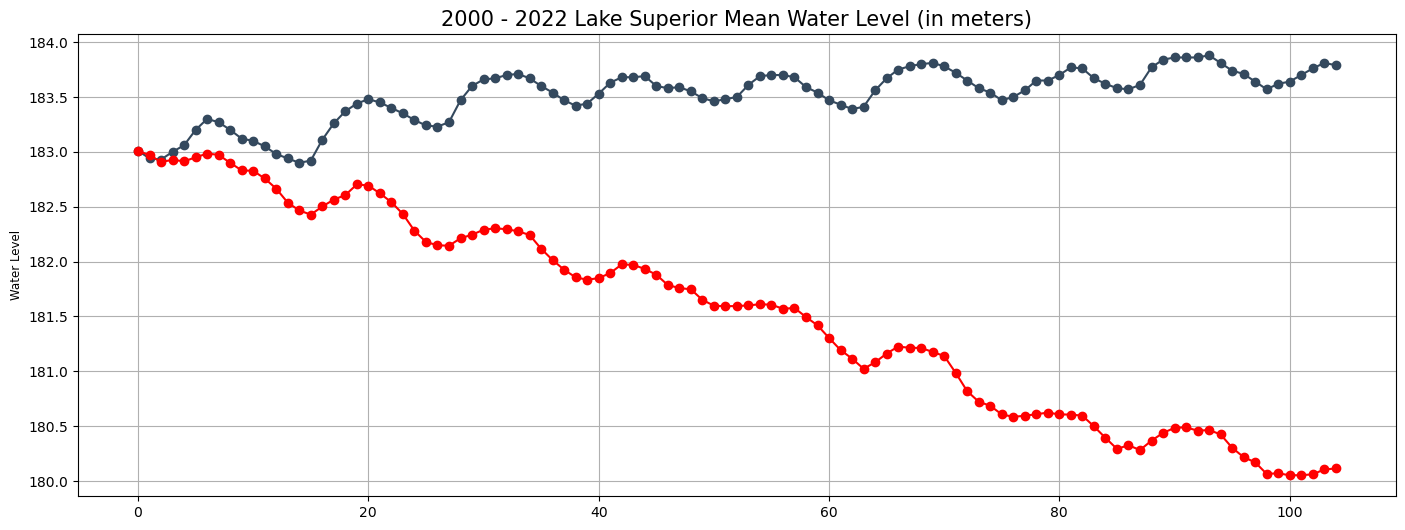

In [27]:
plt.figure(figsize=(17, 6))
plt.plot(range(0, 105), depth_data[144:249, 0], marker='o', linestyle='-', color='#34495E')
plt.plot(range(0, 105), Y[:, 0], marker='o', linestyle='-', color='#FF0000')
plt.title(f'2000 - 2022 Lake Superior Mean Water Level (in meters)', fontsize=15)

plt.ylabel('Water Level', fontsize=8.5)

# plt.xticks(list(range(0, len(lakeDataFrame['Time']), 12)) + [len(lakeDataFrame['Time']) - 1])
# plt.tick_params(axis='x', labelsize=7)
# plt.tick_params(axis='y', labelsize=7)

plt.grid(True)
# plt.savefig(f"{lakeName}_water_level.png", dpi=400)
plt.show()

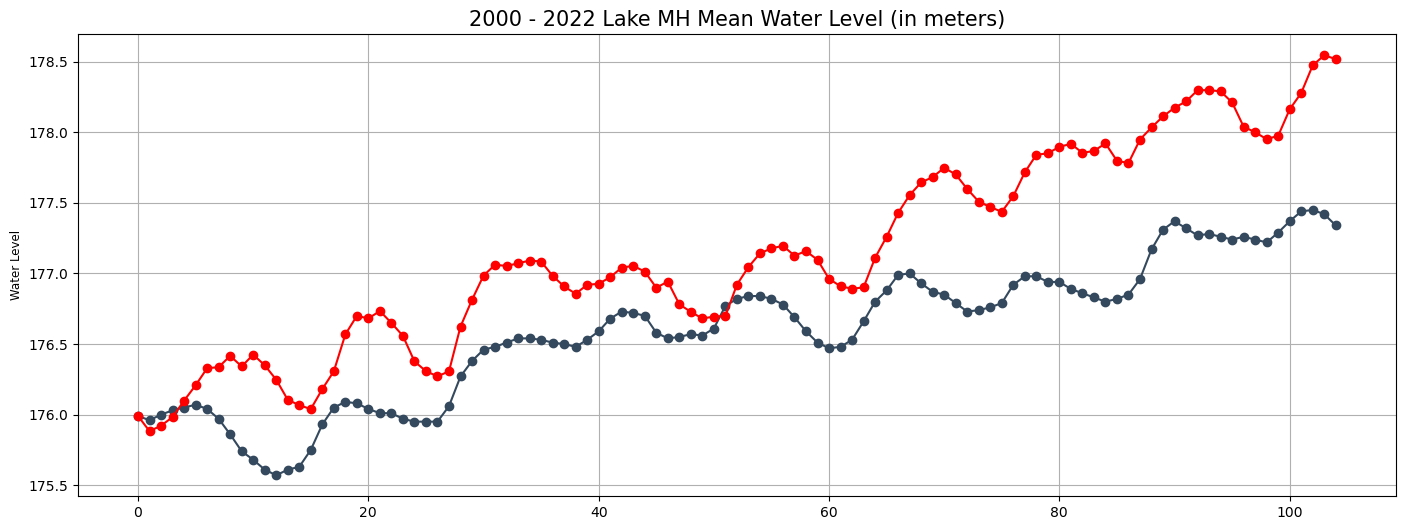

In [28]:
plt.figure(figsize=(17, 6))
plt.plot(range(0, 105), depth_data[144:249, 1], marker='o', linestyle='-', color='#34495E')
plt.plot(range(0, 105), Y[:, 1], marker='o', linestyle='-', color='#FF0000')
plt.title(f'2000 - 2022 Lake MH Mean Water Level (in meters)', fontsize=15)

plt.ylabel('Water Level', fontsize=8.5)

# plt.xticks(list(range(0, len(lakeDataFrame['Time']), 12)) + [len(lakeDataFrame['Time']) - 1])
# plt.tick_params(axis='x', labelsize=7)
# plt.tick_params(axis='y', labelsize=7)

plt.grid(True)
# plt.savefig(f"{lakeName}_water_level.png", dpi=400)
plt.show()

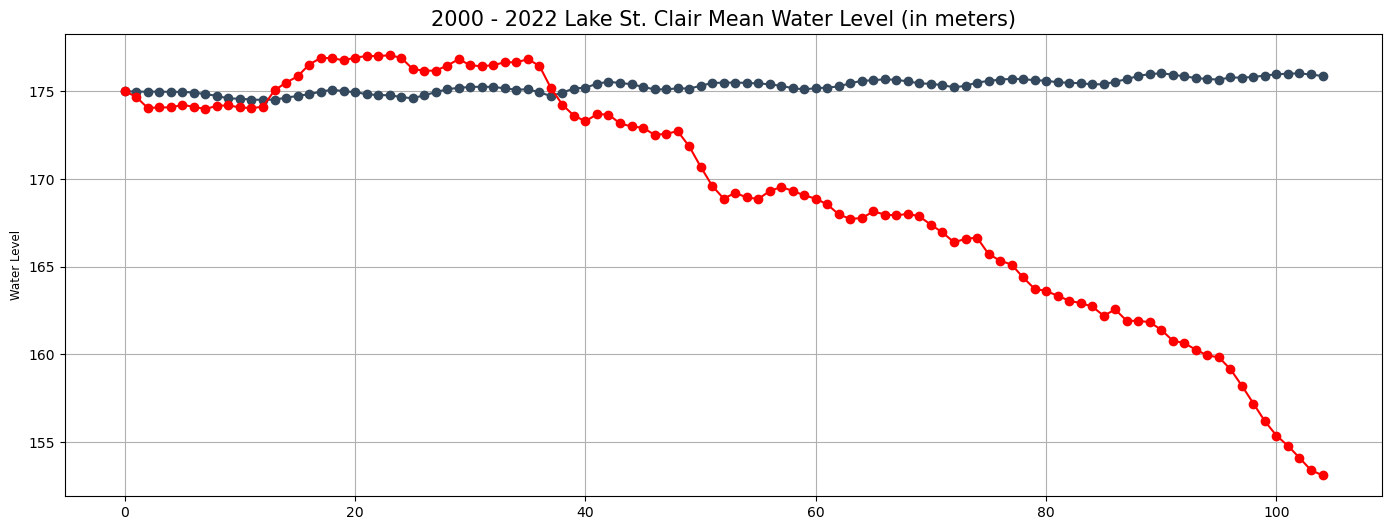

In [29]:
plt.figure(figsize=(17, 6))
plt.plot(range(0, 105), depth_data[144:249, 2], marker='o', linestyle='-', color='#34495E')
plt.plot(range(0, 105), Y[:, 2], marker='o', linestyle='-', color='#FF0000')
plt.title(f'2000 - 2022 Lake St. Clair Mean Water Level (in meters)', fontsize=15)

plt.ylabel('Water Level', fontsize=8.5)

# plt.xticks(list(range(0, len(lakeDataFrame['Time']), 12)) + [len(lakeDataFrame['Time']) - 1])
# plt.tick_params(axis='x', labelsize=7)
# plt.tick_params(axis='y', labelsize=7)

plt.grid(True)
# plt.savefig(f"{lakeName}_water_level.png", dpi=400)
plt.show()

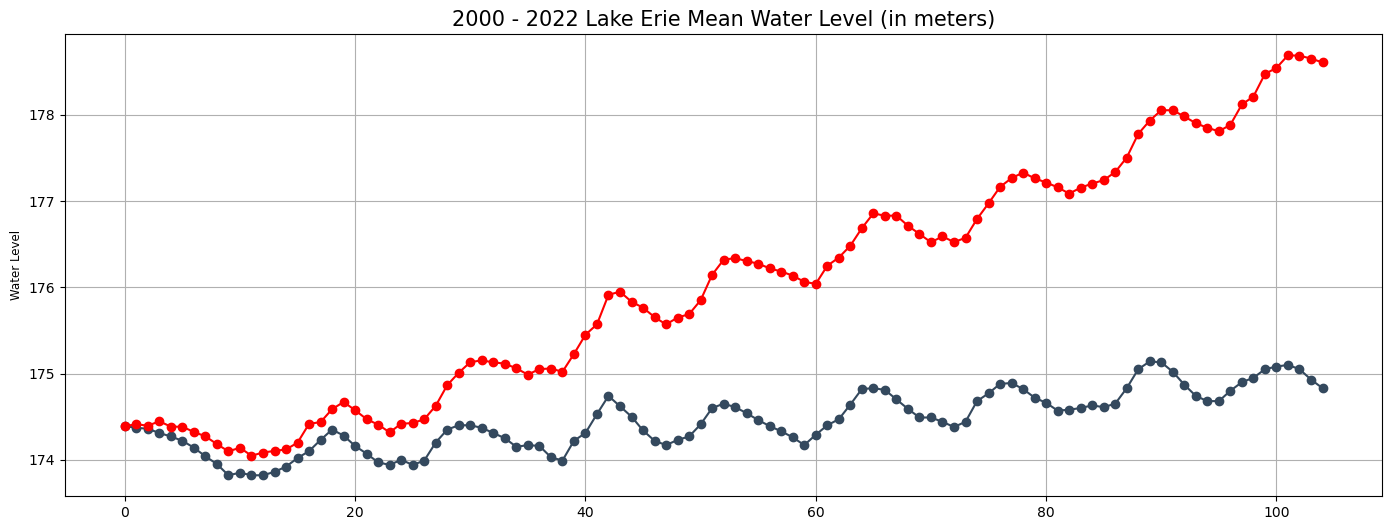

In [30]:
plt.figure(figsize=(17, 6))
plt.plot(range(0, 105), depth_data[144:249, 3], marker='o', linestyle='-', color='#34495E')
plt.plot(range(0, 105), Y[:, 3], marker='o', linestyle='-', color='#FF0000')
plt.title(f'2000 - 2022 Lake Erie Mean Water Level (in meters)', fontsize=15)

plt.ylabel('Water Level', fontsize=8.5)

# plt.xticks(list(range(0, len(lakeDataFrame['Time']), 12)) + [len(lakeDataFrame['Time']) - 1])
# plt.tick_params(axis='x', labelsize=7)
# plt.tick_params(axis='y', labelsize=7)

plt.grid(True)
# plt.savefig(f"{lakeName}_water_level.png", dpi=400)
plt.show()

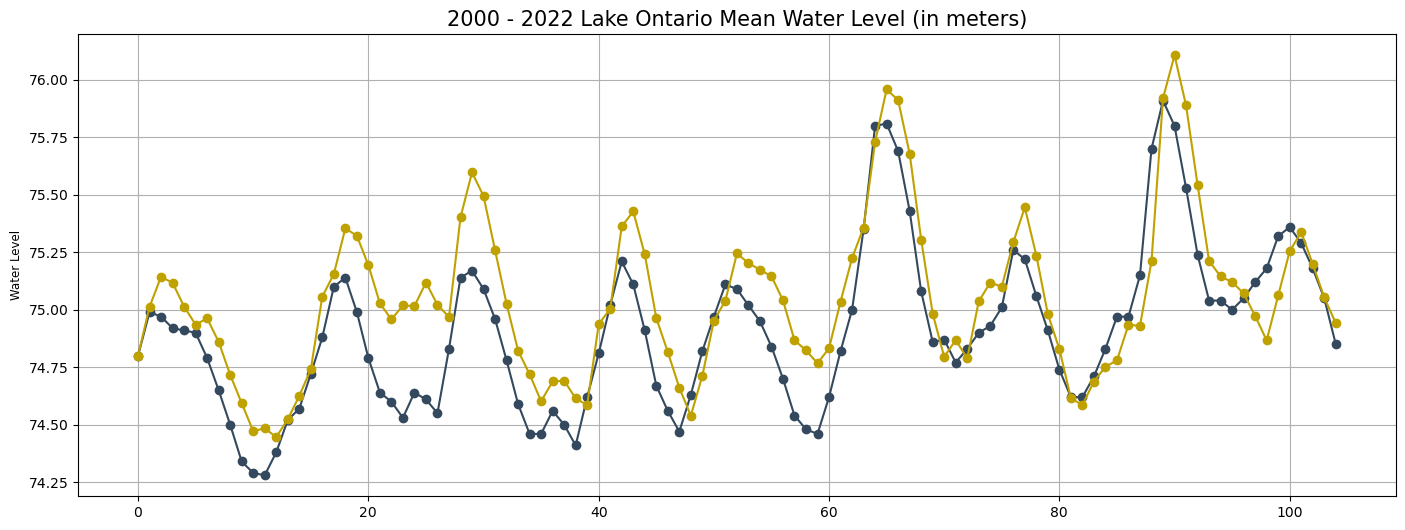

In [32]:
plt.figure(figsize=(17, 6))
plt.plot(range(0, 105), depth_data[144:249, 4], marker='o', linestyle='-', color='#34495E')
plt.plot(range(0, 105), Y[:, 4], marker='o', linestyle='-', color='#BFA100')
plt.title(f'2000 - 2022 Lake Ontario Mean Water Level (in meters)', fontsize=15)

plt.ylabel('Water Level', fontsize=8.5)

# plt.xticks(list(range(0, len(lakeDataFrame['Time']), 12)) + [len(lakeDataFrame['Time']) - 1])
# plt.tick_params(axis='x', labelsize=7)
# plt.tick_params(axis='y', labelsize=7)

plt.grid(True)
# plt.savefig(f"{lakeName}_water_level.png", dpi=400)
plt.show()

## Evaluate accuracy of the weather data

Note: z is the calculated exogenous flow based on historical data

In [67]:
### LAKE ST. CLAIR ###

stc_depth_test = depth_data[144:252, 2]

stc_river_flow_test = flow_data[:-1, 1]/(1.11 * 1e9)

detroit_river_flow_test = flow_data[:-1, 2]/(1.11 * 1e9)

stc_z_calculated = [stc_depth_test[i + 1] - stc_depth_test[i] for i in range(len(stc_depth_test) - 1)] + (detroit_river_flow_test - stc_river_flow_test)

stc_z_data = 


array([ 1.07007724,  1.08619127,  0.51929112,  0.09579785,  0.        ,
        0.07902258,  0.06032111, -0.29131778, -0.18967419,  0.18815056,
        0.12853387,  0.18498334, -0.19864889,  0.21725929,  0.55413056,
        0.89670862,  0.05434111,  0.48029248,  0.29580278, -0.21715389,
       -0.00420215,  0.29530445,  0.45625323,  0.51861557,  1.12573613,
        0.52560631,  1.04459557,  0.8246242 ,  0.53779612,  0.49964087,
        0.18081945,  0.09932445,  0.1315957 ,  0.17281278,  0.28788226,
        0.55794001,  1.25904725,  1.20596124,  1.56239169,  1.04185486,
        0.01501666,  0.7944613 ,  0.52128445,  0.14498334, -0.06742688,
        0.3246289 ,  0.12563495,  0.25131778,  1.2882278 ,  2.01997702,
        2.38382004,  1.61680487, -0.09249167,  0.1915957 ,  0.05882611,
       -0.37797334, -0.24869678,  0.20480612,  0.31351721,  0.60978945,
        1.32139502,  1.18087744,  1.16392002,  1.03928174,  0.48096334,
        0.35755646,  0.06932445, -0.11416389,  0.01224731,  0.54